In [28]:
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import numpy as np
# ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=20)

# pf = get_problem("dtlz2",n_var=6, n_obj=3).pareto_front(ref_dirs)

# pf = get_problem('zdt1').pareto_front()
name = 'RE37'
n_dim = 3
if name.startswith('RE') or name.startswith('VLMOP') :
    pf = np.load(f'Ground_truth_approximate_PF/{name}.npy')
else:
    pf = get_problem(name).pareto_front()

dict_ideal_nadir_points = {
    'RE21' : list([np.array([1237.841423, 0.000276142374915]), np.array([2886.3695604236013, 0.039999999999998245])]),
    'RE32' : list([np.array([0.010205496875, 0.00043904, 0.0]), np.array([37.7831517014, 17561.6, 425062976.628]) ]),
    'RE33' : list([np.array([-0.721525, 1.13907203907, 0.0]), np.array([5.3067, 3.12833430979, 25.0])]),
    'RE36' : list([np.array([7.89473684213e-05, 12.0, 0.0]), np.array([5.931, 56.0, 0.355720675227]) ]),
    'RE37' : list([np.array([0.00889341391106, 0.00488, -0.431499999825]), np.array([0.98949120096, 0.956587924661, 0.987530948586])]),
    'RE41': list([np.array([15.576004, 3.58525, 10.61064375, 0.0]), np.array([39.2905121788, 4.42725, 13.09138125, 9.49401929991])])
}

if name.startswith('RE'):
    z_ideal = dict_ideal_nadir_points[name][0]
    z_nadir = dict_ideal_nadir_points[name][1]
    pf = (pf-z_ideal)/(z_nadir- z_ideal)

hv = HV(ref_point=np.ones(n_dim) + 0.1)
true_gt = hv(pf)

In [6]:
def HV_compute(x, hv_max):        
        sol = x
        hv_result = []
        for i in range(sol.shape[0]): 
            hv_result.append(hv(sol[:i])) 
        log_hv = np.log(np.clip(hv_max - hv_result, a_min=1e-14, a_max=hv_max))
        return log_hv,hv_result

### Load results from file

In [29]:
import numpy as np
svgd_data = []
psl_data = []
da_data = []

# choose evaluation file:
# for example: evaluation_zdt3_Y_20_stein_local_{i}.npy
for i in range(5):
    svgd_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-MOBO/final/batch_10/logs_GS_0.1_RE5_stein_local_True_warm_False_c_1_alpha_0.1_lr_0.001_scalar_chebyshev_steps_1000_n_cand1000_3_4_n_samples_10/evaluation_RE5_Y_4_stein_local_True_warm_False_{i}.npy'))
    psl_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/PSL_MOBO/batch_10/logs_0.1_RE37_3_4_PSL-MOBO_n_samples_10/evaluation_RE37_Y_4PSL-MOBO_n_samples_10_{i}.npy'))
    da_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/DA/logs_0.1_RE37_3_4_nsamples10/evaluation_RE37_Y_4_{i}.npy'))




log_hv_svgd_list = []
log_hv_psl_list = []
da_log_hv_list = []
dgemo_log_hv_list = []
moead_ego_log_hv_list = []
tsemo_data_hv_list = []
usemo_ei_data_hv_list = []

for i in range(5):
    svgd,_ = HV_compute(svgd_data[i],true_gt)
    log_hv_svgd_list.append(svgd)
    psl, _ = HV_compute(psl_data[i],true_gt)
    log_hv_psl_list.append(psl)
    da, _ = HV_compute(da_data[i],true_gt)
    da_log_hv_list.append(da)


    
svgd = np.stack(log_hv_svgd_list,axis= 0)
psl = np.stack(log_hv_psl_list,axis= 0)
da = np.stack(da_log_hv_list,axis= 0)



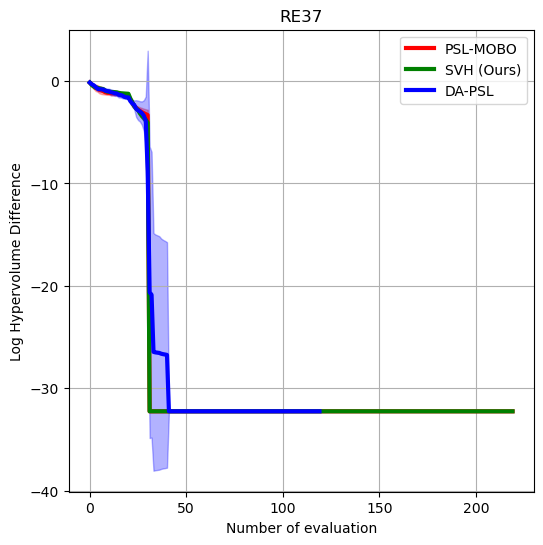

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

svgd_mean = np.mean(svgd, axis=0)
svgd_var = np.std(svgd, 0)

psl_mean = np.mean(psl, axis=0)
psl_var = np.std(psl, 0)

da_mean = np.mean(da, axis=0)
da_var = np.std(da, 0)

                    
# Plotting the lines with shaded areas using fill_between

plt.plot(range(len(psl_mean)), psl_mean, color='red',linewidth=3, label='PSL-MOBO')
plt.fill_between(range(len(psl_mean)), psl_mean - psl_var, psl_mean + psl_var, color='red', alpha=0.3)

plt.plot(range(len(svgd_mean)), svgd_mean, color='green', linewidth=3,label='SVH (Ours)')
plt.fill_between(range(len(svgd_mean)), svgd_mean - svgd_var, svgd_mean + svgd_var, color='green', alpha=0.3)

plt.plot(range(len(da_mean)), da_mean, color='b', linewidth=3,label='DA-PSL')
plt.fill_between(range(len(da_mean)), da_mean - da_var, da_mean + da_var, color='b', alpha=0.3)

# Adding labels and title
plt.title(f'{name}')
plt.xlabel('Number of evaluation')
plt.ylabel('Log Hypervolume Difference')
plt.grid()
plt.legend()

plt.show()

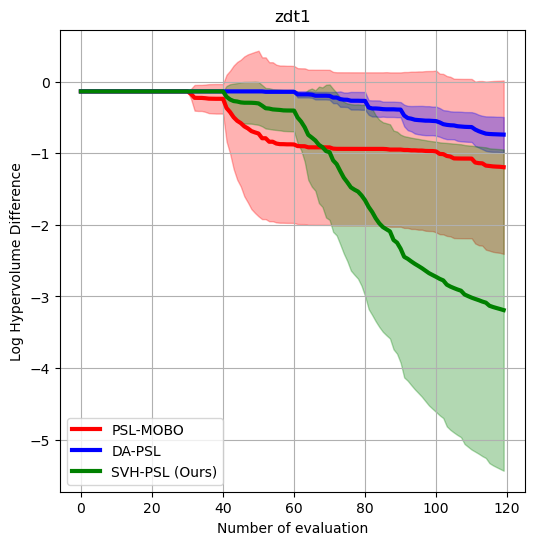

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

svgd_mean = np.mean(svgd, axis=0)
svgd_var = np.std(svgd, 0)

psl_mean = np.mean(psl, axis=0)
psl_var = np.std(psl, 0)

da_mean = np.mean(da, axis=0)
da_var = np.std(da, 0)

                    
# Plotting the lines with shaded areas using fill_between

plt.plot(range(len(psl_mean)), psl_mean, color='red',linewidth=3, label='PSL-MOBO')
plt.fill_between(range(len(psl_mean)), psl_mean - psl_var, psl_mean + psl_var, color='red', alpha=0.3)

plt.plot(range(len(da_mean)), da_mean, color='b', linewidth=3,label='DA-PSL')
plt.fill_between(range(len(da_mean)), da_mean - da_var, da_mean + da_var, color='b', alpha=0.3)

plt.plot(range(len(svgd_mean)), svgd_mean, color='green', linewidth=3,label='SVH-PSL (Ours)')
plt.fill_between(range(len(svgd_mean)), svgd_mean - svgd_var, svgd_mean + svgd_var, color='green', alpha=0.3)

# Adding labels and title
plt.title(f'{name}')
plt.xlabel('Number of evaluation')
plt.ylabel('Log Hypervolume Difference')
plt.grid()
plt.legend()

plt.show()